# 作业12：图像绕任意中心位置旋转 

作业目的：
    
    教材中给出的旋转变换矩阵默认图像旋转中心是图像的左上角的原点，在实际应用中图像可能围绕任一点进行旋转，本次作业旨在帮助大家理解图像旋转的基本原理。

作业内容：
    
    对图像以(x0,y0)为圆心顺时针旋转一个角度theta，推导对应的变换矩阵T

# 图像绕任意位置旋转

假定图像图像绕$(x_0,y_0)$逆时针旋转角度$\theta$,则变换公式为：
$$
x'=(x-x_0)cos\theta - (y-y_0)sin\theta + x_0
$$
$$
y'=(x-x_0)sin\theta + (y-y_0)cos\theta + y_0
$$

旋转矩阵为：
$$
   \begin{bmatrix}x'\\y'\\1 \end{bmatrix}=\begin{bmatrix}cos\theta & -sin\theta & -x_0 cos\theta-y_0 sin\theta + x_0 \\ sin\theta&cos\theta&x_0 sin\theta + y_0 cos\theta + y_0\\ 0 & 0 & 1 \\ \end{bmatrix}\begin{bmatrix}x\\y\\1\\\end{bmatrix}
$$

In [73]:
import numpy as np
from skimage import io,transform,img_as_float
import matplotlib.pyplot as plt

In [74]:
def rotationMatrix(theta,pos):
    (x0,y0)=pos
    cos = np.cos(np.radians(theta))
    sin = np.sin(np.radians(theta))
    matrix = np.zeros((3,3))
    matrix[0,0] = cos
    matrix[0,1] = -sin
    matrix[1,0] = sin
    matrix[1,1] = cos
    matrix[0,2] = -cos * x0 - sin * y0 + x0
    matrix[1,2] =  cos * y0 + sin * x0 + y0
    matrix[2,2] = 1
    return matrix

In [99]:
def rotate(org_img,theta,pos,output_shape,resize=True):
    ref_img=np.zeros(output_shape)
    h=org_img.shape[0]
    w=org_img.shape[1]
    for i in range(h):
        for j in range(w):
            posNew=np.dot(rotationMatrix(theta,pos),np.array([[j],[i],[1]]).reshape(3,1))
            posNew=(int(posNew[0,0]),int(posNew[1,0]))
            ref_img[posNew[0]][posNew[1]]=org_img[j][i]
    return ref_img           

## 估计变换后的图像的大小并填充图片

In [76]:
def trans_and_box(matrix, shape):
    h = shape[0]
    w = shape[1]
    rect_original = np.array([[0,0,1],[0,h,1],[w,0,1],[w,h,1]])  #构建四个顶点齐次坐标
    rect_mapped = np.dot(matrix, rect_original.T)  #利用矩阵运算计算变换后的顶点位置
    min_val = rect_mapped.min(axis=1)  #计算两个方向的最小值
    max_val = rect_mapped.max(axis=1)  #计算两个方向的最大值
    #计算反向平移的值
    trans_pos = (-np.floor(min_val[0]) if (min_val[0]>0) else -np.ceil(min_val[0]), 
                 -np.floor(min_val[1]) if (min_val[1]>0) else -np.ceil(min_val[1]))
    #计算图像变换后高度和宽度，注意skimage中图像采用(h,w,c)方式来表示
    output_shape = (int(np.ceil(max_val[1]-min_val[1])), \
                    int(np.ceil(max_val[0]-min_val[0])))
    return trans_pos, output_shape

In [103]:
org_img = img_as_float(io.imread("img/DIP.tif",as_gray=True))
deg = 30
pos = (0,0)
mat = rotationMatrix(deg,pos)
trans_pos, output_shape = trans_and_box(mat,org_img.shape)
ref_img = rotate(org_img,deg,pos,output_shape,resize=True)

In [100]:
deg = -30
pos = (0,0)
mat = rotationMatrix(deg,pos)
trans_pos, output_shape = trans_and_box(mat,org_img.shape)
tform = transform.SimilarityTransform(mat) + transform.SimilarityTransform(translation=trans_pos)
out_img  = transform.warp(org_img, tform.inverse,output_shape=output_shape)

Text(0.5, 1.0, 'Around pivot')

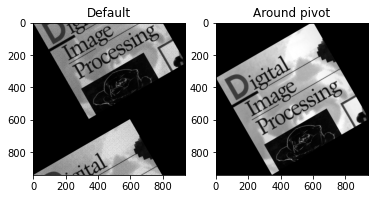

In [104]:
plt.subplot(121)
plt.imshow(ref_img,cmap='gray')
plt.title('Default')

plt.subplot(122)
plt.imshow(out_img,cmap='gray')
plt.title('Around pivot')

作业提交：

    （1）PDF文件格式

    （2）给出详细的推导过程